<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/HR_log_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/HR_Analytics.xlsx')



In [ ]:
df.shape

(1480, 38)

In [ ]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df1 = df.drop(['EmpID', 'AgeGroup', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus',  'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender'], axis=1)

In [ ]:
df1.head()

,Age,Attrition,MonthlyIncome
0,18,Yes,1420
1,18,No,1200
2,18,Yes,1878
3,18,No,1051
4,18,Yes,1904


In [ ]:
df1['Attrition'].replace(['No', 'Yes'], [0,1],inplace=True)

In [ ]:
df1

,Age,Attrition,MonthlyIncome
0,18,1,1420
1,18,0,1200
2,18,1,1878
3,18,0,1051
4,18,1,1904
...,...,...,...
1475,60,0,19566
1476,60,0,10266
1477,60,0,5405
1478,60,0,5220


In [ ]:
df1.isnull().sum()

Age              0
Attrition        0
MonthlyIncome    0
dtype: int64

In [52]:
df1['Attrition'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       1
       ..
1475    0
1476    0
1477    0
1478    0
1479    0
Name: Attrition, Length: 1480, dtype: int64>

In [ ]:
x = df1.drop(['Attrition'], axis=1).values
y = df1['Attrition'].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,train_size=0.7)




In [33]:
from sklearn.ensemble import RandomForestClassifier
modelf = RandomForestClassifier()
modelf.fit(x, y)

RandomForestClassifier()

In [36]:
y_predf = modelf.predict(x)
modelf.score(x, y)

0.9993243243243243

In [42]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
cm=confusion_matrix(y, y_predf)
cm

array([[1242,    0],
       [   1,  237]])

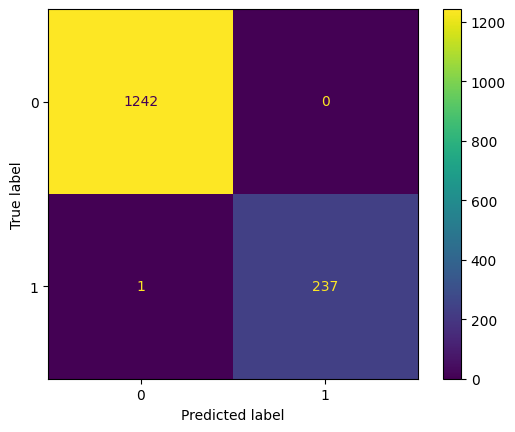

In [45]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelf.classes_)
import matplotlib.pyplot as plt
display.plot()



In [39]:
print(classification_report(y,y_predf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1242
           1       1.00      1.00      1.00       238

    accuracy                           1.00      1480
   macro avg       1.00      1.00      1.00      1480
weighted avg       1.00      1.00      1.00      1480

